### Имеется набор данных.
### Необходимо проанализировать его и представить ответы на вопросы с визуализацией каждого пункта.

 
**Задание 1**
- а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
- б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
-  в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

 Подгруппа – Sub-Category
 Дата – Order_date
 Сделать вывод на основе полученных результатов.

**Задание 2**
-  Построить boxplot («Ящик с усами») на основе продаж (Sales).
-  Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
-  Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

**Задание 3**
- Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
- Сгруппировать данные на основе региона и группы продаж (Region, Sale_group).
- Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


In [35]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Общая информация и предобработка данных

In [36]:
sheet_url = "https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/export?format=csv"
df = pd.read_csv(sheet_url)

In [37]:
df.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


In [39]:
df.describe()

,ID
count,9800.00
mean,4900.50
std,2829.16
min,1.00
25%,2450.75
50%,4900.50
75%,7350.25
max,9800.00


In [40]:
print(df.duplicated().sum())

0


In [41]:
clm_list = df.columns.to_list()
clm_list = [c.lower() for c in clm_list]
clm_list[1] = 'order_date'
df.columns = clm_list

In [42]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

C:\Users\arthu\AppData\Local\Temp\ipykernel_40008\2503569225.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'])


In [43]:
df['sales'] = df['sales'].str.replace(',', '.')

In [44]:
df['sales'] = round(df['sales'].astype(float), 2)

In [45]:
def print_group(data):
    display(df['class'].unique())
    print()
    display(df['region'].unique())
    print()
    display(df['sub-category'].unique())
    display(df['year'].unique())

In [46]:
print_group(df)

array(['Стандарт', 'Первый класс', 'Второй класс', 'Same Day'],
      dtype=object)

array(['Урал', 'Владивосток', 'Калиниград', 'Москва'], dtype=object)

array(['Appliances', 'Bookcases', 'Phones', 'Binders', 'Fasteners',
       'Chairs', 'Paper', 'Furnishings', 'Art', 'Storage', 'Labels',
       'Accessories', 'Tables', 'Supplies', 'Machines', 'Copiers',
       'Envelopes'], dtype=object)

array([2018, 2017, 2016, 2015])

# Задание 1

### а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [48]:
task_1_a = df.groupby('sub-category', as_index=False).agg(sub_count=('sub-category', 'count')).sort_values(by='sub_count', ascending=False).reset_index(drop=True)

In [49]:
task_1_a.head(4)

,sub-category,sub_count
0,Binders,1492
1,Paper,1338
2,Furnishings,931
3,Phones,876


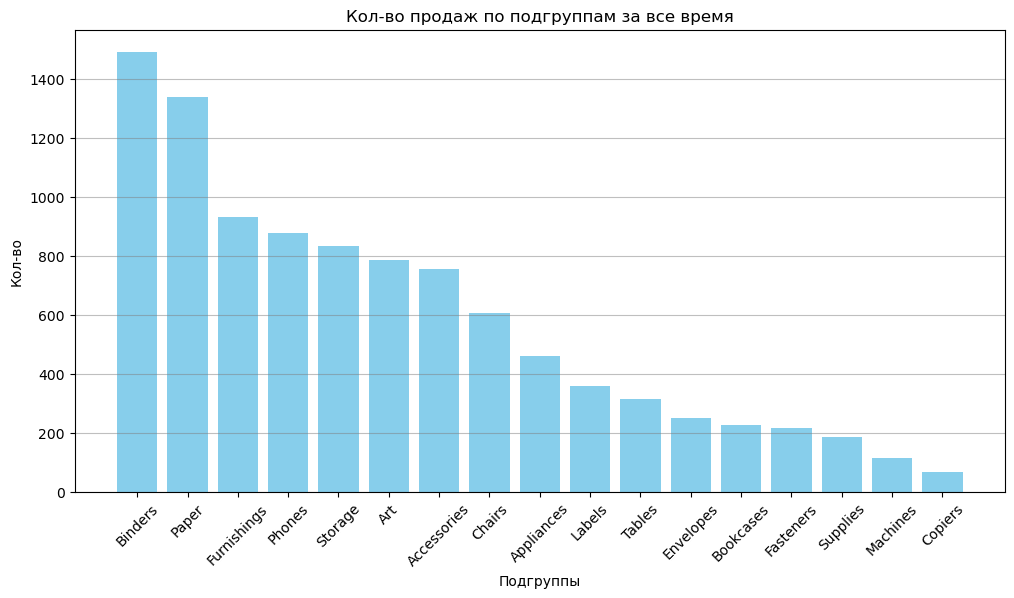

In [50]:
plt.figure(figsize=(12, 6))
plt.bar(task_1_a['sub-category'], task_1_a['sub_count'], color='skyblue')
plt.xlabel('Подгруппы')
plt.ylabel('Кол-во')
plt.title('Кол-во продаж по подгруппам за все время')
plt.xticks(rotation=45) 
plt.grid(axis='y', color='grey', alpha=0.5)
plt.ticklabel_format(style='plain', axis='y')

**Топ 4 подгруппы, которые наиболее часто покупают за все время:**
- Bindres
- Paper
- Furnishings
- Phones

### б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

In [51]:
df['year'].unique()

array([2018, 2017, 2016, 2015])

In [52]:
task_1_б = df[df['year'].isin([2018, 2017])].groupby('sub-category', as_index=False).agg(sub_count=('sub-category', 'count')).sort_values(by='sub_count', ascending=False).reset_index(drop=True)

In [53]:
task_1_б.head(4)

,sub-category,sub_count
0,Binders,900
1,Paper,809
2,Furnishings,557
3,Phones,510


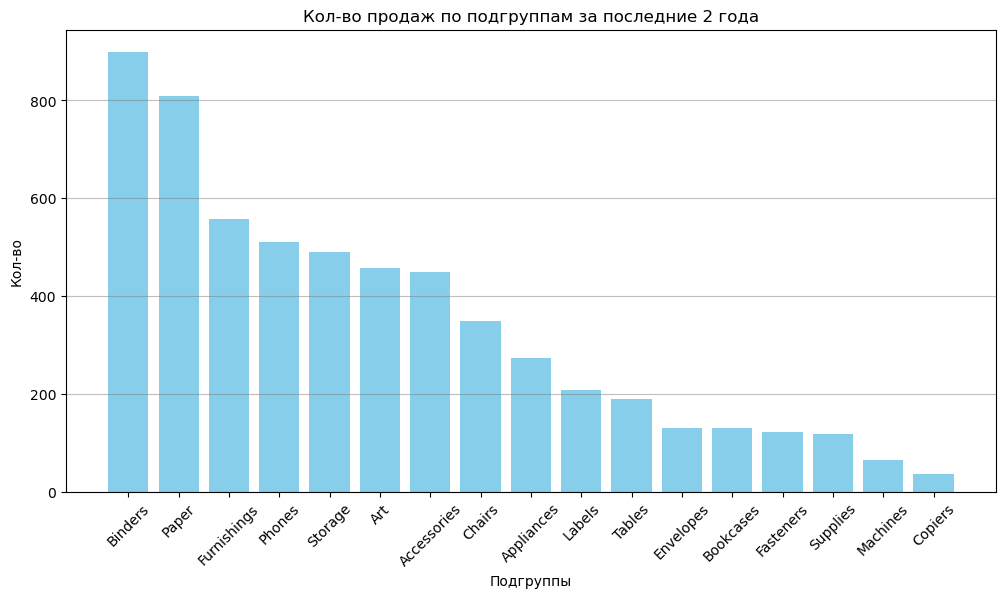

In [54]:
plt.figure(figsize=(12, 6))
plt.bar(task_1_б['sub-category'], task_1_б['sub_count'], color='skyblue')
plt.xlabel('Подгруппы')
plt.ylabel('Кол-во')
plt.title('Кол-во продаж по подгруппам за последние 2 года')
plt.xticks(rotation=45) 
plt.grid(axis='y', color='grey', alpha=0.5)
plt.ticklabel_format(style='plain', axis='y')

**Топ 4 подгруппы товаров, которые наиболее часто покупают за последние два года, совпадают с подгруппами за весь период продаж:**
- Bindres
- Paper
- Furnishings
- Phones

### в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [55]:
task_1_в = df[df['year'] == 2018].groupby('sub-category', as_index=False).agg(sub_count=('sub-category', 'count')).sort_values(by='sub_count', ascending=False).reset_index(drop=True)

In [56]:
task_1_в.head(4)

,sub-category,sub_count
0,Binders,492
1,Paper,452
2,Furnishings,310
3,Phones,290


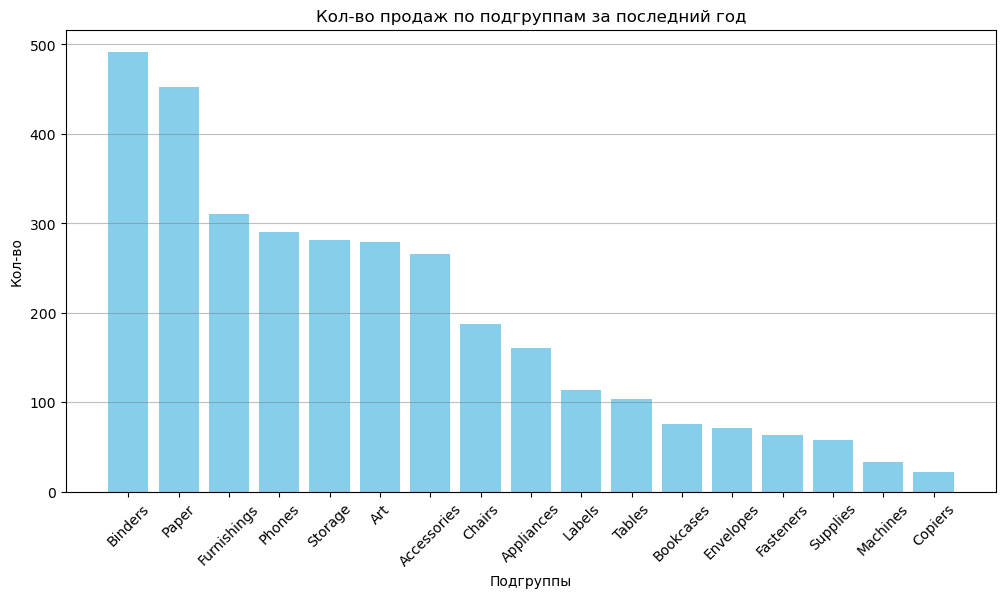

In [57]:
plt.figure(figsize=(12, 6))
plt.bar(task_1_в['sub-category'], task_1_в['sub_count'], color='skyblue')
plt.xlabel('Подгруппы')
plt.ylabel('Кол-во')
plt.title('Кол-во продаж по подгруппам за последний год')
plt.xticks(rotation=45) 
plt.grid(axis='y', color='grey', alpha=0.5)
plt.ticklabel_format(style='plain', axis='y')

**Топ 4 наиболее часто покупаемые подгруппы товаров за последний год снова те же:**
- Bindres
- Paper
- Furnishings
- Phones

### Подведение итогов
- Можно сделать вывод, что независимо от временного ряда, указанного в задании, наиболее покупаемые подгруппы товаров остаются неизменными

# Задание 2

- **Построить boxplot («Ящик с усами») на основе продаж (Sales).**
- **Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).**
- **Можно использовать правило трех сигм. Однако любые другие решения приветствуются.**

In [58]:
df.describe()

,id,order_date,sales,year,month
count,9800.00,9800,9800.00,9800.00,9800.00
mean,4900.50,2017-05-01 05:13:51.673469184,22921.76,2016.72,7.82
min,1.00,2015-01-03 00:00:00,1002.79,2015.00,1.00
25%,2450.75,2016-05-24 00:00:00,12135.62,2016.00,5.00
50%,4900.50,2017-06-26 00:00:00,22882.06,2017.00,9.00
75%,7350.25,2018-05-15 00:00:00,33730.13,2018.00,11.00
max,9800.00,2018-12-30 00:00:00,44995.41,2018.00,12.00
std,2829.16,NaN,12602.00,1.12,3.28


In [59]:
print(f'Медиана: {round(df['sales'].mean())}')
print(f'Среднее: {round(df['sales'].median())}')
print(f'Стандартное отклонение: {round(df['sales'].std())}')
cv_df = round((((round(df['sales'].std()))/(round(df['sales'].mean())))*100),2)
print(f'Коэффициент вариации: {cv_df}')

Медиана: 22922
Среднее: 22882
Стандартное отклонение: 12602
Коэффициент вариации: 54.98


**Медиана и среднее значение примерно равны. Это может указывать на то, что распределение данных близко к симметричному, но коэффициент вариации достаточной большой - 55%**

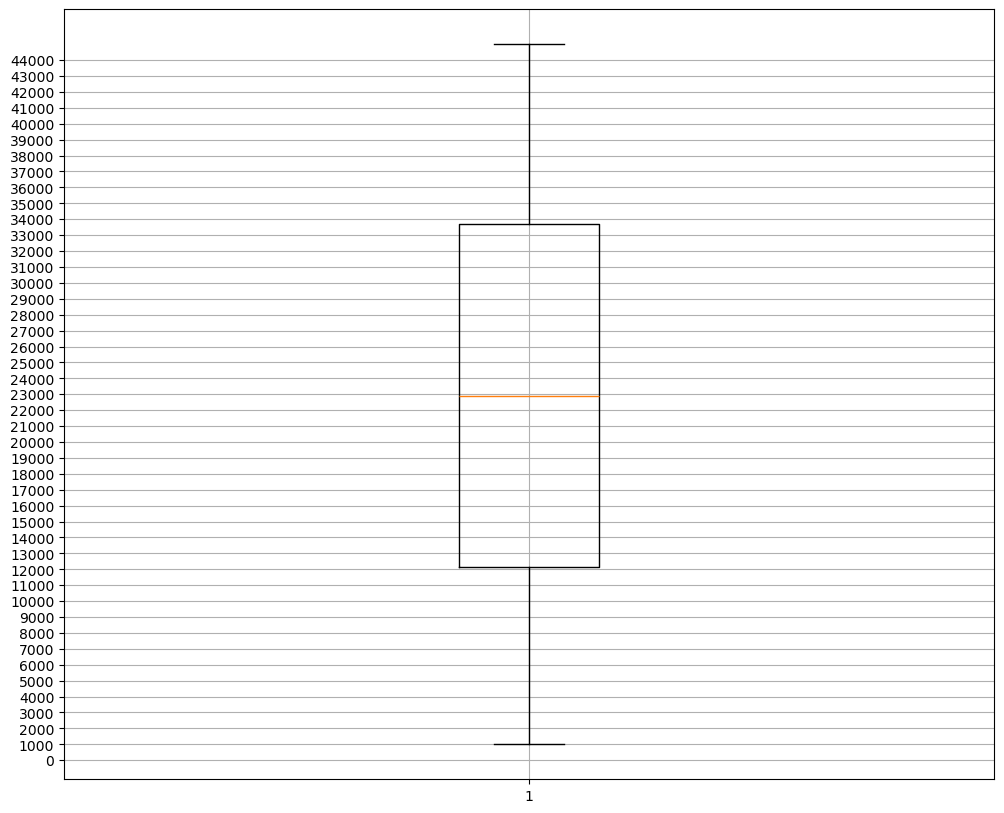

In [60]:
plt.figure(figsize=(12, 10))
plt.boxplot(df['sales'])
plt.yticks(np.arange(0, 45000, 1000))
plt.grid(True)
plt.show()

In [61]:
df['sales'].value_counts().head(10)

sales
42130.22    2
3062.69     2
4156.91     2
11335.56    2
15890.29    2
9368.68     2
24894.81    2
19095.05    2
39095.66    2
44392.54    1
Name: count, dtype: int64

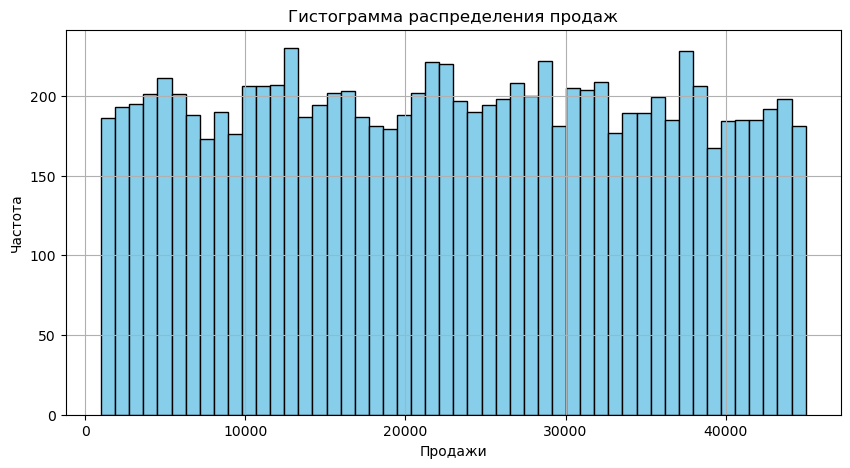

In [62]:
plt.figure(figsize=(10, 5))
plt.title('Гистограмма распределения продаж')
plt.hist(df['sales'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Продажи')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

### Предварительные итоги
- **Не вижу необходимости избавляться от аномальных значений, так как данные распределены более-менее равномерно. Тем не менее, давайте применим правило трёх сигм и посмотрим, как это повлияет на распределение данных в boxplot. Следует отметить, что правило трёх сигм наиболее подходит для нормального распределения данных, а не для равномерного распределения.**

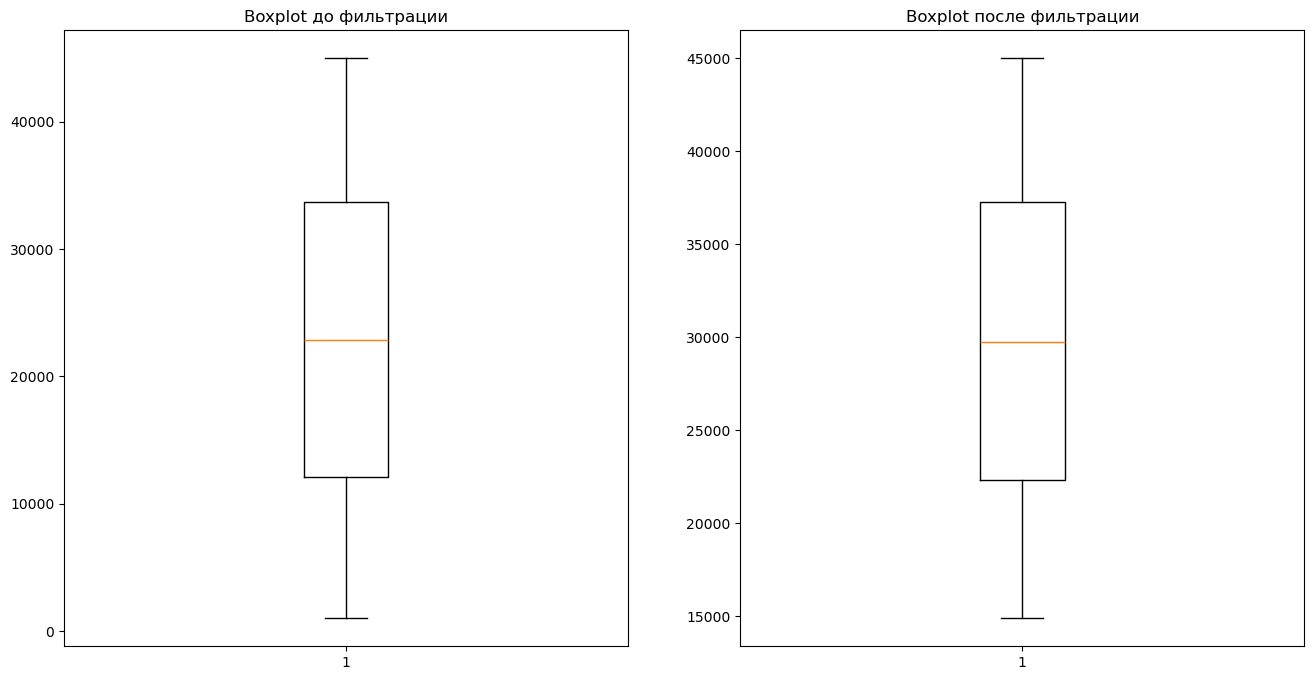

Границы для аномалий: Нижняя граница = 14884.24, Верхняя граница = 60727.76


In [63]:
mean = df['sales'].mean()
std_dev = df['sales'].std()

lower_bound = round(((mean - 3 * std_dev)*-1), 2)
upper_bound = round((mean + 3 * std_dev), 2)


df_filtered = df[(df['sales'] >= lower_bound) & (df['sales'] <= upper_bound)]


plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.boxplot(df['sales'])
plt.title('Boxplot до фильтрации')

plt.subplot(1, 2, 2)
plt.boxplot(df_filtered['sales'])
plt.title('Boxplot после фильтрации')

plt.show()

print(f"Границы для аномалий: Нижняя граница = {lower_bound}, Верхняя граница = {upper_bound}")


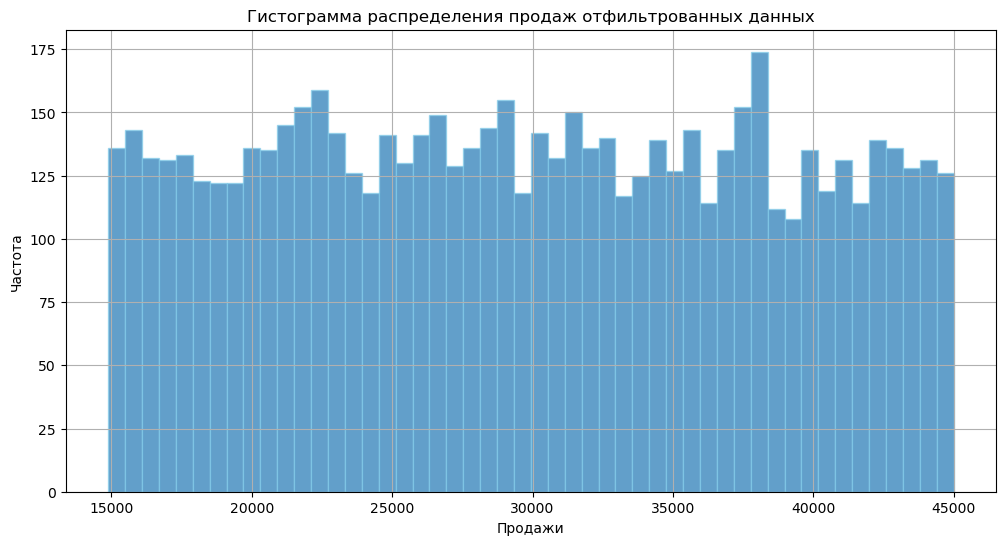

In [153]:
plt.figure(figsize=(12, 6))
plt.hist(df_filtered['sales'], bins=50, edgecolor='skyblue', alpha=0.7)
plt.title('Гистограмма распределения продаж отфильтрованных данных')
plt.xlabel('Продажи')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [65]:
df_filtered.describe()

,id,order_date,sales,year,month
count,6703.00,6703,6703.00,6703.00,6703.00
mean,4892.07,2017-05-02 02:12:07.196777728,29814.35,2016.72,7.85
min,2.00,2015-01-04 00:00:00,14887.53,2015.00,1.00
25%,2460.00,2016-05-19 00:00:00,22333.99,2016.00,5.00
50%,4874.00,2017-06-28 00:00:00,29764.85,2017.00,9.00
75%,7365.50,2018-05-20 00:00:00,37254.86,2018.00,11.00
max,9800.00,2018-12-30 00:00:00,44995.41,2018.00,12.00
std,2829.15,NaN,8623.65,1.13,3.29


In [66]:
print(f'Медиана: {round(df_filtered['sales'].mean())}')
print(f'Среднее: {round(df_filtered['sales'].median())}')
print(f'Стандартное отклонение: {round(df_filtered['sales'].std())}')
cv_dffiltered = round((((round(df_filtered['sales'].std()))/(round(df_filtered['sales'].mean())))*100),2)
print(f'Коэффициент вариации: {cv_dffiltered}')

Медиана: 29814
Среднее: 29765
Стандартное отклонение: 8624
Коэффициент вариации: 28.93


In [180]:
print(f'Доля отфильтрованных данных от первоначальных: {round(1-(df_filtered.shape[0] / df.shape[0]), 2)} ')
print(f'Изменение стандартного отклонения от первоначальных данных: {round(1-(round(df_filtered['sales'].std())/ round(df['sales'].std())), 2)}')

Доля отфильтрованных данных от первоначальных: 0.32 
Изменение стандартного отклонения от первоначальных данных: 0.32


### Подведение итогов
- После удаления "аномальных значений" в данных с использованием правила трёх сигм, мы обнаружили, что осталось 68% от первоначального объема данных. Потеря 32% данных может снизить полноту и репрезентативность анализа.
- В первоначальном датафрейме среднее значение и медиана были равны, что свидетельствует о симметричном распределении.
- Данные также имели более-менее равномерное распределение, что поддерживает идею о том, что удаление аномалий может быть не столь необходимым в данном контексте.

После фильтрации по правилу трёх сигм:

- **Среднее значение** увеличислось на 31%.
- **Медиана возросла** на 30%.
- **Стандартное отклонение** снизилось на 32%.

Коэффициент вариации (отношение стандартного отклонения к среднему значению) снизился с 55% до 29%, что указывает на уменьшение относительного разброса данных после фильтрации. Об этом же свидетельствует снижение стандартного отклонения. Но потери данных и изменённые характеристики могут не оправдывать удаления аномалий в данном случае, поэтому вновь не вижу необходимости избавляться от аномальных значений.

# Задание 3

**Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales**
- Сгруппировать данные на основе региона и группы продаж (Region, Sale_group).
- Определить основные тенденции и паттерны.
- Выделить наиболее «прибыльную» группу.


**Принято решение разделить столбец "sales" на квартильные группы (Q1, межквартильный размах и Q3) из-за относительно равномерного распределения данных**

In [158]:
pr_0 = np.percentile(df['sales'], 0, interpolation='linear')
print(pr_0)
pr_25 = np.percentile(df['sales'], 25, interpolation='linear')
print(pr_25)
pr_75 = np.percentile(df['sales'], 75, interpolation='linear')
print(pr_75)

1002.79
12135.625
33730.13


In [159]:
iqr = (pr_75 - pr_25)
print(iqr)

21594.504999999997


In [168]:
def sales_group(data):
    if data >=pr_0 and  data <=pr_25:
        return 'low'
    elif data > pr_25 and  data <=pr_75:
        return 'medium'
    else:
        return 'high'

In [169]:
df['sale_group'] = df['sales'].apply(sales_group)

In [170]:
df.head(5)

,id,order_date,class,region,sub-category,sales,year,month,sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08,2018,12,high
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61,2018,12,medium
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86,2018,12,high
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00,2018,12,low
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13,2018,12,medium


In [171]:
gr_rgsl = df.groupby(['region', 'sale_group'], as_index=False).agg(count=('sales', 'count'), sum=('sales', 'sum'))
gr_rgsl['sum_M'] = gr_rgsl['sum'] / 1000000

In [172]:
gr_rgsl['average_revenue'] = gr_rgsl['sum'] / gr_rgsl['count']

In [173]:
gr_rgsl.sort_values(by=['sale_group', 'sum'], ascending=False)

,region,sale_group,count,sum,sum_M,average_revenue
5,Калиниград,medium,1621,37049906.36,37.05,22856.20
2,Владивосток,medium,1352,31077638.96,31.08,22986.42
11,Урал,medium,1138,26066839.72,26.07,22905.83
8,Москва,medium,789,18032525.33,18.03,22854.91
4,Калиниград,low,763,5069058.89,5.07,6643.59
1,Владивосток,low,715,4642905.29,4.64,6493.57
10,Урал,low,580,3849450.41,3.85,6636.98
7,Москва,low,392,2528321.88,2.53,6449.80
3,Калиниград,high,756,29811334.39,29.81,39432.98
0,Владивосток,high,718,28232142.81,28.23,39320.53


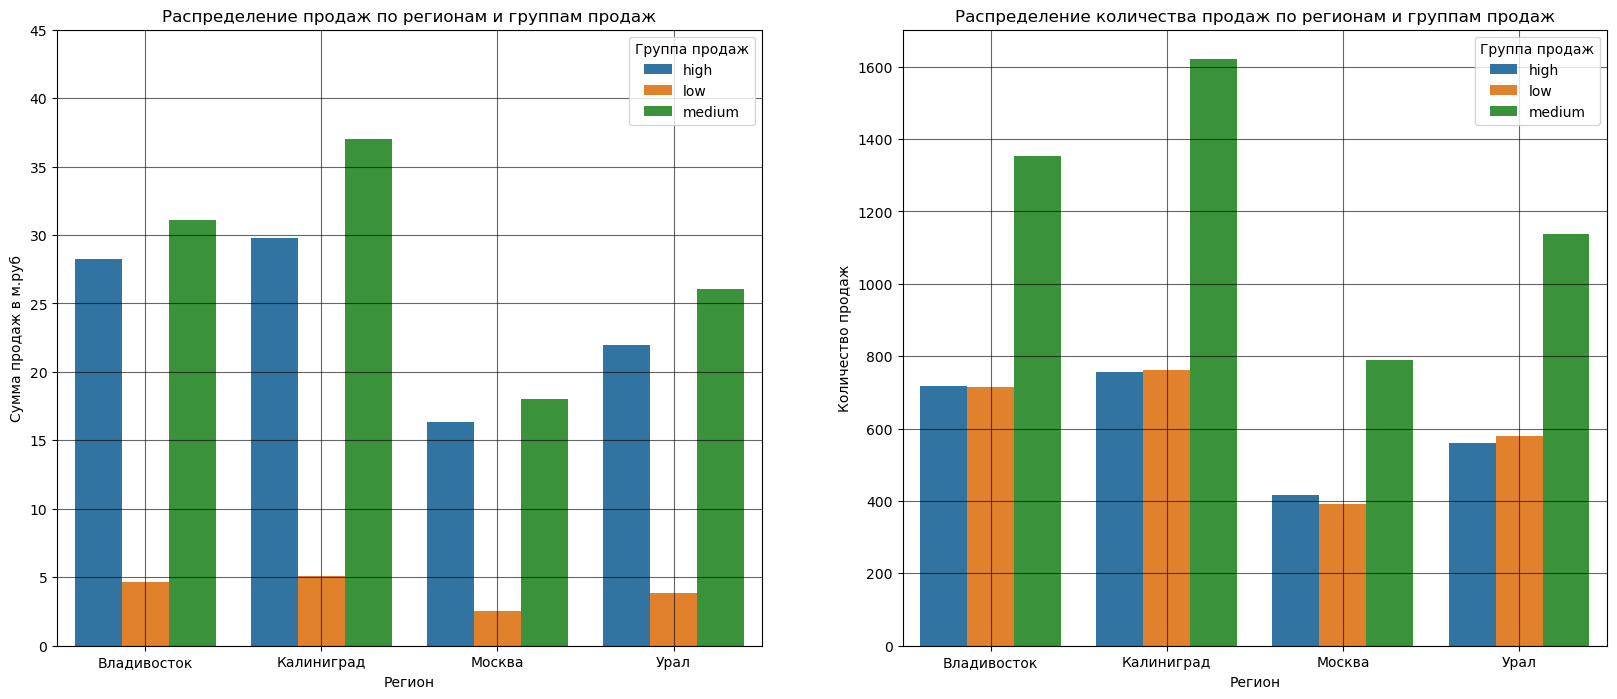

In [176]:
plt.figure(figsize=(20, 8))


plt.subplot(1, 2, 1)
sns.barplot(data=gr_rgsl, x='region', y='sum_M', hue='sale_group')
plt.title('Распределение продаж по регионам и группам продаж')
plt.xlabel('Регион')
plt.ylabel('Сумма продаж в м.руб')
plt.legend(title='Группа продаж')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, color='black', alpha=0.6)
plt.yticks(np.arange(0, 50, 5))


plt.subplot(1, 2, 2)
sns.barplot(data=gr_rgsl, x='region', y='count', hue='sale_group')
plt.title('Распределение количества продаж по регионам и группам продаж')
plt.xlabel('Регион')
plt.ylabel('Количество продаж')
plt.legend(title='Группа продаж')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, color='black', alpha=0.6)


## Вывод
Анализ показал, что Калининград является рекордсменом как по прибыли, так и по количеству продаж во всех трех сегментах: low, medium и high. Если рассматривать самую продаваему группу по кол-ву и сумме продаж в разрезе региона, то можно сделать следующие выводы:
- Владивосток - medium
- Калининград - medium
- Москва - medium
- Урал - medium


Группа продаж 'low' уступает другим группам по сумме продаж, но по количеству продаж практически сравнима с группой 'high.

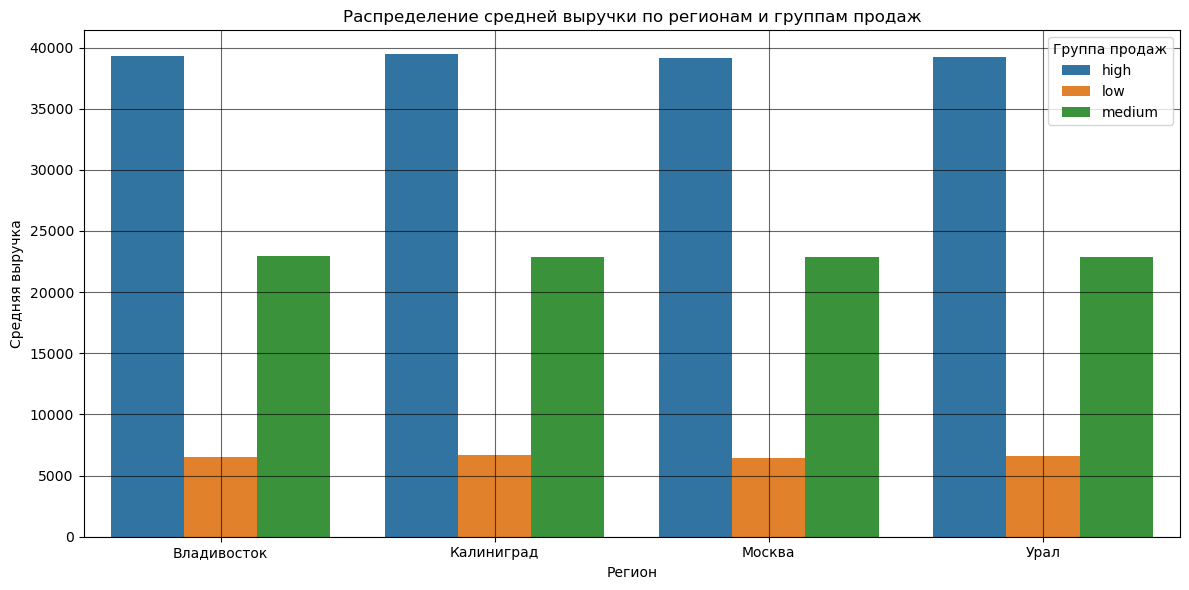

In [175]:
plt.figure(figsize=(12, 6))
sns.barplot(data=gr_rgsl, x='region', y='average_revenue', hue='sale_group')
plt.title('Распределение средней выручки по регионам и группам продаж')
plt.xlabel('Регион')
plt.ylabel('Средняя выручка')
plt.legend(title='Группа продаж')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, color='black', alpha=0.6)
plt.tight_layout()
plt.show()

## Вывод
На основе представленного графика, можно сделать следующие выводы:
- **Сегмент 'high':** Наибольшая средняя выручка наблюдается во всех регионах, и их показатели практически одинаковы.
- **Сегмент 'medium':** Средняя выручка в этом сегменте значительно ниже, чем в сегменте 'high', но она сохраняется на относительно одинаковом уровне во всех регионах.
- **Сегмент 'low':** Выручка в этом сегменте самая низкая среди всех сегментов во всех регионах. Вклад данного сегмента в общую выручку минимален. 
- а также можно отметить, что во всех регионах разница средней выручки между сегментами 'high', 'medium' и 'low' незначительна.